In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('algeria_clean.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [5]:
df.drop(['day','month','year'],axis=1,inplace=True)
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: count, dtype: int64

In [7]:
df['Classes'] = df['Classes'].str.replace('Classes', 'not fire')
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [9]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [10]:
df['Classes'].unique()

array([0, 1])

In [11]:
x=df.drop('FWI',axis=1)
y=df['FWI']
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1.0
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1.0
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1.0
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1.0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [14]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.367786,0.017876,-0.275211,0.748246,0.458347,0.363058,0.556063,0.437070,0.477113,0.172104
RH,-0.367786,1.000000,0.321064,0.236698,-0.456987,-0.351882,-0.185739,-0.638511,-0.302647,-0.396692,-0.402065
Ws,0.017876,0.321064,1.000000,0.216235,0.007203,0.032697,0.105798,0.051952,0.065167,-0.036576,-0.245197
Rain,-0.275211,0.236698,0.216235,1.000000,-0.514665,-0.286380,-0.297158,-0.350688,-0.297860,-0.376986,-0.080694
FFMC,0.748246,-0.456987,0.007203,-0.514665,1.000000,0.585050,0.495050,0.721389,0.576000,0.751838,0.203007
DMC,0.458347,-0.351882,0.032697,-0.286380,0.585050,1.000000,0.878205,0.656891,0.982083,0.573325,0.196478
DC,0.363058,-0.185739,0.105798,-0.297158,0.495050,0.878205,1.000000,0.501831,0.941741,0.489508,-0.077451
ISI,0.556063,-0.638511,0.051952,-0.350688,0.721389,0.656891,0.501831,1.000000,0.629020,0.740575,0.271707
BUI,0.437070,-0.302647,0.065167,-0.297860,0.576000,0.982083,0.941741,0.629020,1.000000,0.574622,0.092557
Classes,0.477113,-0.396692,-0.036576,-0.376986,0.751838,0.573325,0.489508,0.740575,0.574622,1.000000,0.181080


<Axes: >

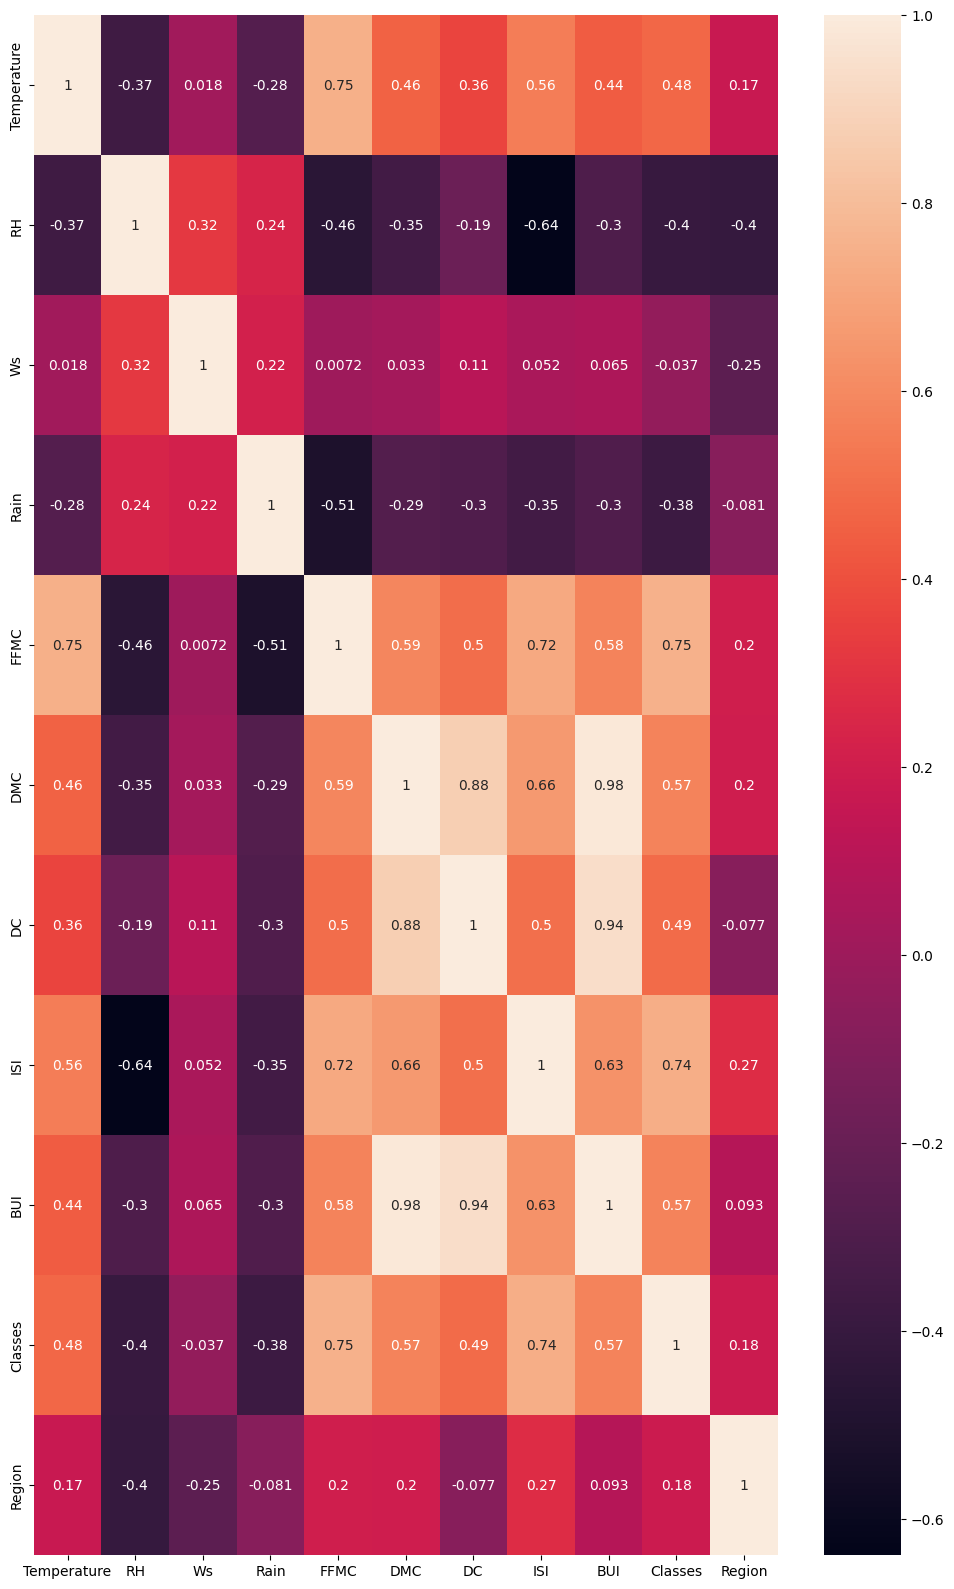

In [15]:
plt.figure(figsize=(12,20))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [16]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [17]:
corr_features=correlation(x_train,0.85)

In [18]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)


In [19]:
x_train.shape


(183, 9)

- Redundant features overload the model: Highly correlated columns often carry the same signal — keeping both adds noise without extra value.
- Hurts interpretability: The model juggles overlapping features and gives unstable or misleading weight distributions.
- Ridge reduces impact, not redundancy: It shrinks coefficients but doesn’t remove duplicative info; confusion still seeps in.
- Simplifies training and boosts generalization: Dropping one of each correlated pair gives the model cleaner input → faster convergence and better predictions.


In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [21]:
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.transform(x_test)


In [22]:
x_train_scale

array([[-0.64393998,  0.17761838,  1.2063152 , ..., -0.77911951,
        -1.13468057, -1.00547949],
       [ 0.95158636, -0.40980626,  0.1747466 , ...,  0.83671004,
         0.8813053 ,  0.99455037],
       [-0.18807531,  0.63450421, -0.51296581, ..., -0.22443175,
         0.8813053 ,  0.99455037],
       ...,
       [-1.55566932,  0.89558183,  0.5186028 , ..., -1.09263867,
        -1.13468057, -1.00547949],
       [ 0.26778936, -0.34453686,  0.1747466 , ...,  0.47495716,
         0.8813053 ,  0.99455037],
       [-0.41600765,  0.96085123,  1.89402761, ..., -0.87558694,
        -1.13468057, -1.00547949]], shape=(183, 9))

In [23]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train_scale,y_train)
from sklearn.metrics import mean_absolute_error

y_pred=regression.predict(x_test_scale)

mae=mean_absolute_error(y_test,y_pred)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(mae,score)

0.5631746257275264 0.990355131002176


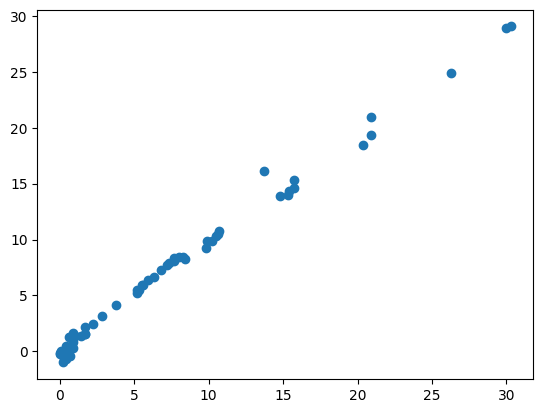

In [24]:
plt.scatter(y_test,y_pred)

In [25]:
#3LASSO REGRESSION

from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train_scale,y_train)
from sklearn.metrics import mean_absolute_error

y_pred=lasso.predict(x_test_scale)

mae=mean_absolute_error(y_test,y_pred)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(mae,score)


1.2096336058594148 0.9518841449497847


In [26]:
##RIDGE



from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train_scale,y_train)
from sklearn.metrics import mean_absolute_error

y_pred=ridge.predict(x_test_scale)

mae=mean_absolute_error(y_test,y_pred)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(mae,score)

0.5862164770461074 0.9898021111575351


In [27]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(x_train_scale,y_train)
from sklearn.metrics import mean_absolute_error

y_pred=elastic.predict(x_test_scale)

mae=mean_absolute_error(y_test,y_pred)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(mae,score)

1.8677637068404607 0.8824626947737427


In [28]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
elastic.fit(x_train_scale,y_train)
from sklearn.metrics import mean_absolute_error

y_pred=elastic.predict(x_test_scale)

mae=mean_absolute_error(y_test,y_pred)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(mae,score)

1.8677637068404607 0.8824626947737427


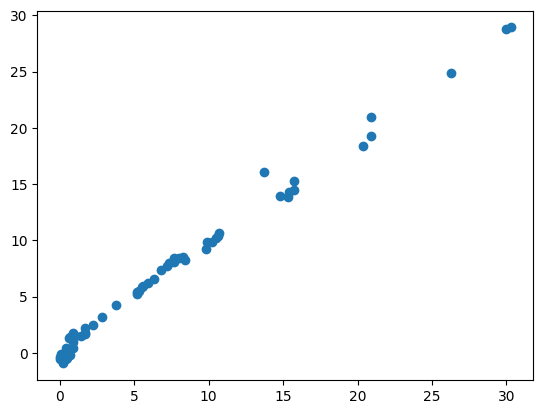

In [29]:
lassocv.fit(x_train_scale,y_train)
y_pred=lassocv.predict(x_test_scale)
plt.scatter(y_test,y_pred)

In [30]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(mean_absolute_error(y_test,y_pred),score)

0.5938731140626787 0.9897175040915684


0.9898021111575351


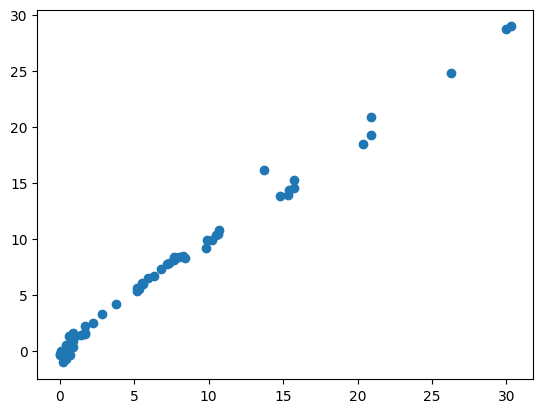

In [31]:
from sklearn.linear_model import    RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scale,y_train)
y_pred=ridgecv.predict(x_test_scale)
y_pred
plt.scatter(y_test,y_pred)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

In [32]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))

In [33]:
pickle.dump(ridge,open('ridge.pkl','wb'))

In [37]:
x.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')